In [1]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
file_path = "E:\School\Dataset\data.csv"  
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12956\3285122668.py:9: SyntaxWarning: invalid escape sequence '\S'
  file_path = "E:\School\Dataset\data.csv"


In [2]:
# Step 2: Drop the 'IsHoliday' column and define independent (X) and dependent (y) variables
X = data.drop(columns=['Weekly_Sales', 'IsHoliday'])
y = data['Weekly_Sales']

In [3]:
# Step 3: Train/test split and train the XGBoost model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [4]:
# Step 4: Evaluate the model
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

# Step 5: Get feature importance 
feature_importance = model.feature_importances_

# Create a DataFrame to associate importance with column names
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print the feature importance for each variable
print(coef_df)

RMSE: 4188.42
MAE: 2460.52
MAPE: 4326.87%
        Variable  Importance
2           Size    0.383175
1           Dept    0.342890
0          Store    0.123442
10           CPI    0.043286
11  Unemployment    0.027231
7      MarkDown3    0.018669
3    Temperature    0.018352
4     Fuel_Price    0.010544
8      MarkDown4    0.009432
6      MarkDown2    0.009288
9      MarkDown5    0.007333
5      MarkDown1    0.006358


In [5]:
# Step 6: Predict sales for Store 1 and Dept 1
store_1_dept_1 = data[(data['Store'] == 1) & (data['Dept'] == 1)]
X_store_dept = store_1_dept_1.drop(columns=['Weekly_Sales', 'IsHoliday'])

# Predict sales for Store 1 and Dept 1
store_dept_sales_pred = model.predict(X_store_dept)

# Actual sales for Store 1 and Dept 1
store_dept_sales_actual = store_1_dept_1['Weekly_Sales']

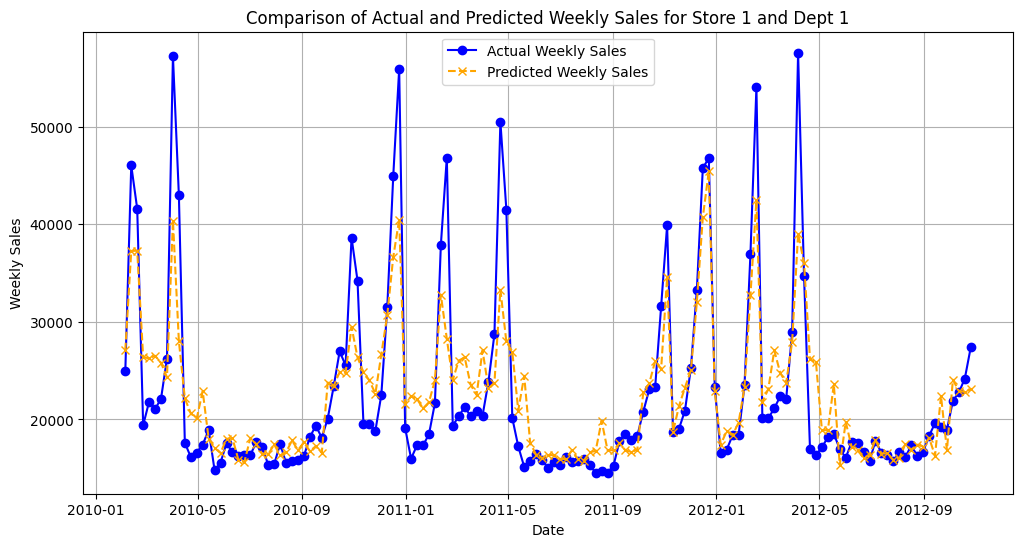

In [6]:
# Step 7: Plot actual vs predicted sales for Store 1 and Dept 1
plt.figure(figsize=(12, 6))
plt.plot(store_1_dept_1.index, store_dept_sales_actual, label='Actual Weekly Sales', color='blue', marker='o', linestyle='-')
plt.plot(store_1_dept_1.index, store_dept_sales_pred, label='Predicted Weekly Sales', color='orange', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Comparison of Actual and Predicted Weekly Sales for Store 1 and Dept 1')
plt.legend()
plt.grid()
plt.show()

In [7]:
import numpy as np
from datetime import timedelta

# Step 8: Predict the next 5 weeks using rolling predictions
num_weeks_to_predict = 5
predicted_weeks = []
predicted_sales = []

# Get the last 10 weeks of data for the initial prediction
rolling_data = store_1_dept_1.iloc[-10:].copy()

# Loop to predict the next 5 weeks
for i in range(num_weeks_to_predict):
    # Drop 'Weekly_Sales' and 'IsHoliday' columns for prediction input
    X_rolling = rolling_data.drop(columns=['Weekly_Sales', 'IsHoliday'])

    # Predict sales for the next week using the model
    next_week_pred = model.predict(X_rolling)

    # Add the next week prediction is the last value of the predicted array
    predicted_next_week_sales = next_week_pred[0]

    # Append the prediction to the results list
    predicted_sales.append(predicted_next_week_sales)
    
    # Calculate the next week's date
    next_week_date = rolling_data.index[-1] + timedelta(weeks=1)
    predicted_weeks.append(next_week_date)
    
    # Print the predicted value for this week
    print(f"Predicted sales for the week starting on {next_week_date.strftime('%Y-%m-%d')}: {predicted_next_week_sales:.2f}")
    
    # Update rolling_data: add the new predicted week and remove the oldest week
    # Create a new row with the predicted value (placeholders for other features if needed)
    new_row = rolling_data.iloc[-1:].copy()
    new_row.index = [next_week_date]
    new_row['Weekly_Sales'] = predicted_next_week_sales
    rolling_data = pd.concat([rolling_data, new_row]).iloc[1:]  # Shift the rolling window

Predicted sales for the week starting on 2012-11-02: 17413.19
Predicted sales for the week starting on 2012-11-09: 17214.51
Predicted sales for the week starting on 2012-11-16: 18122.36
Predicted sales for the week starting on 2012-11-23: 16285.85
Predicted sales for the week starting on 2012-11-30: 22397.15


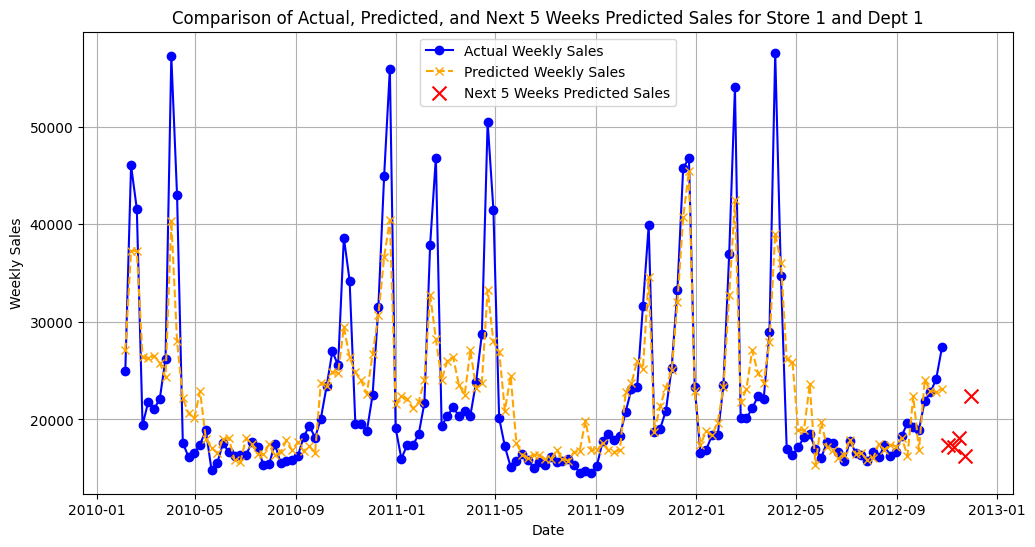


Final Predictions for the next 5 weeks:
Week starting 2012-11-02: Predicted Sales = 17413.19
Week starting 2012-11-09: Predicted Sales = 17214.51
Week starting 2012-11-16: Predicted Sales = 18122.36
Week starting 2012-11-23: Predicted Sales = 16285.85
Week starting 2012-11-30: Predicted Sales = 22397.15


In [8]:
# Step 9: Plot actual, predicted, and future predicted sales including the 5 predicted weeks
plt.figure(figsize=(12, 6))
plt.plot(store_1_dept_1.index, store_dept_sales_actual, label='Actual Weekly Sales', color='blue', marker='o', linestyle='-')
plt.plot(store_1_dept_1.index, store_dept_sales_pred, label='Predicted Weekly Sales', color='orange', marker='x', linestyle='--')
plt.scatter(predicted_weeks, predicted_sales, color='red', marker='x', s=100, label='Next 5 Weeks Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Comparison of Actual, Predicted, and Next 5 Weeks Predicted Sales for Store 1 and Dept 1')
plt.legend()
plt.grid()


plt.show()

# Print all predicted sales for the next 5 weeks at the end
print("\nFinal Predictions for the next 5 weeks:")
for week, sales in zip(predicted_weeks, predicted_sales):
    print(f"Week starting {week.strftime('%Y-%m-%d')}: Predicted Sales = {sales:.2f}")

In [10]:
#example for code
import pandas as pd
import numpy as np

# Giả sử df là DataFrame đã có sẵn
# df chứa dữ liệu với cột 'sales', index là 'date', và có các cột 'store' và 'dept'
# Lọc dữ liệu của store 1 và dept 1
store_id = 1
dept_id = 1
df_filtered = df[(df['store'] == store_id) & (df['dept'] == dept_id)]

# Chỉ lấy 10 ngày cuối cùng từ dữ liệu này
X_copy = df_filtered.drop(columns=['sales']).tail(10).copy()

# Biến y chỉ chứa cột 'sales'
y_copy = df_filtered['sales'].tail(10).copy()

# Biến X ban đầu vẫn giữ nguyên không bị ảnh hưởng
X_original = df_filtered.drop(columns=['sales'])

# Giả sử ta muốn dự đoán 5 ngày
n_days_predict = 5

# List để lưu kết quả dự đoán
predictions = []

# Mô hình đã huấn luyện sẵn, giả sử là 'model'
last_date = X_copy.index[-1]

# Vòng lặp để dự đoán 5 ngày tiếp theo
for i in range(n_days_predict):
    # Lấy dữ liệu 10 ngày cuối cùng hiện tại từ X_copy
    X_last_10_days = X_copy.values

    # Dự đoán ngày tiếp theo dựa trên 10 ngày cuối
    next_day_prediction = model.predict(X_last_10_days.reshape(1, -1))

    # Thêm kết quả dự đoán vào danh sách
    predictions.append(next_day_prediction[0])

    # Tạo một ngày mới (ngày tiếp theo) và thêm giá trị dự đoán vào X_copy và y_copy
    next_day = pd.Timestamp(last_date) + pd.Timedelta(days=1)
    
    # Cập nhật X_copy và y_copy cho vòng lặp tiếp theo
    X_copy = X_copy.append(pd.DataFrame([next_day_prediction], index=[next_day], columns=X_copy.columns))
    y_copy = y_copy.append(pd.Series([next_day_prediction[0]], index=[next_day]))

    # Cập nhật ngày cuối cùng
    last_date = next_day

# Hiển thị kết quả dự đoán
print("Dự đoán cho 5 ngày tiếp theo:")
print(predictions)

NameError: name 'df' is not defined